# Importing Libraries


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importing the data set


In [9]:
train = pd.read_csv("loan_train.csv")
test = pd.read_csv("loan_test.csv")

In [10]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [11]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [12]:
print(train.shape, test.shape)

(614, 12) (367, 11)


#  EDA


## Categorical Variable 

### Gender

In [13]:
train.Gender.value_counts(dropna = False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

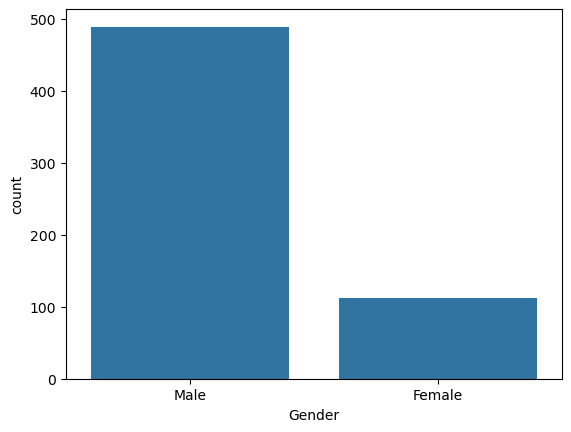

In [14]:
sns.countplot(x="Gender", data = train)
plt.show()

In [15]:
count_male = len(train[train.Gender == 'Male'])
count_female = len(train[train.Gender == 'Female'])
count_null = len(train[train.Gender.isnull()])

print("Percentage of Male applicant: {:.2f} %".format((count_male / (len(train.Gender))*100)))
print("Percentage of Female applicant: {:.2f} %".format((count_female / (len(train.Gender))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Gender))*100)))

Percentage of Male applicant: 79.64 %
Percentage of Female applicant: 18.24 %
Missing values percentage: 2.12 %


We can observe that the number of male applicants is higher compared to female applicants. Also there are missing values in this column.

### Married

In [16]:
train.Married.value_counts(dropna = False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

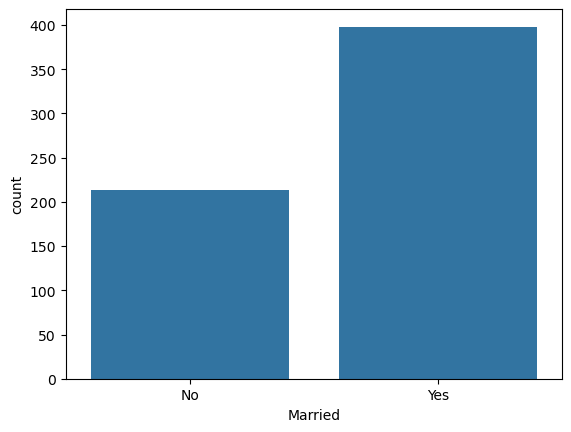

In [17]:
sns.countplot(x = "Married", data = train)
plt.show()

Number of applicants that has been married is significantly higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column as well.

In [18]:
count_married = len(train[train.Married == 'Yes'])
count_non_married = len(train[train.Married == 'No'])
count_null = len(train[train.Married.isnull()])

print("Percentage of married: {:.2f} %".format((count_married / (len(train.Married))*100)))
print("Percentage of Non married applicant: {:.2f} %".format((count_non_married / (len(train.Married))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Married))*100)))

Percentage of married: 64.82 %
Percentage of Non married applicant: 34.69 %
Missing values percentage: 0.49 %


### Education

In [19]:
train.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

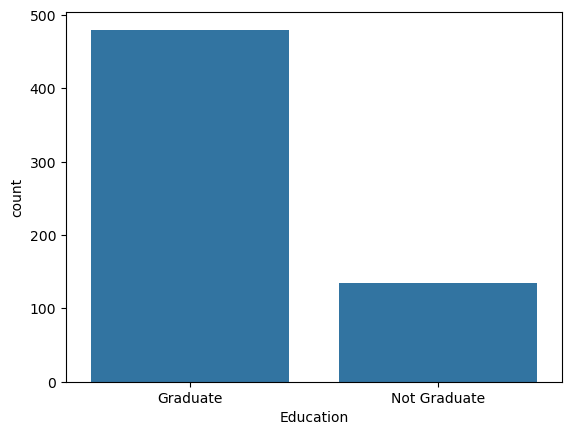

In [20]:
sns.countplot(x = "Education", data = train)
plt.show()

In [21]:
count_graduate = len(train[train.Education == 'Graduate'])
count_not_graduate = len(train[train.Education == 'Not Graduate'])
count_null = len(train[train.Education.isnull()])

print("Percentage of graduate applicant: {:.2f} %".format((count_graduate / (len(train.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f} %".format((count_not_graduate / (len(train.Education))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Education))*100)))

Percentage of graduate applicant: 78.18 %
Percentage of Not graduate applicant: 21.82 %
Missing values percentage: 0.00 %


The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

### Self Employed

In [22]:
train.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

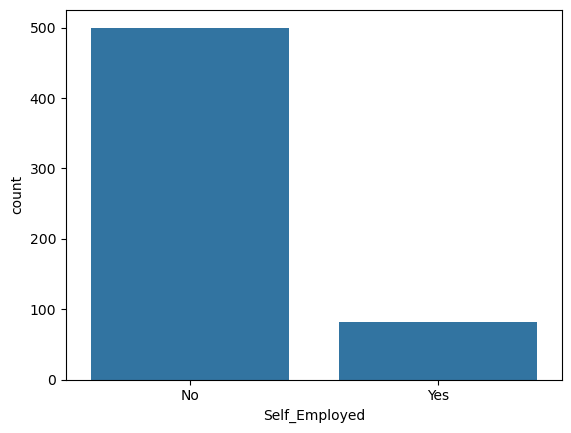

In [23]:
sns.countplot(x = "Self_Employed", data = train)
plt.show()

In [24]:
count_no = len(train[train.Self_Employed == 'No'])
count_yes = len(train[train.Self_Employed == 'Yes'])
count_null = len(train[train.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f} %".format((count_no / (len(train.Self_Employed))*100)))
print("Percentage of self employed: {:.2f} %".format((count_yes / (len(train.Self_Employed))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Self_Employed))*100)))

Percentage of Not self employed: 81.43 %
Percentage of self employed: 13.36 %
Missing values percentage: 5.21 %


The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

### Credit History

In [25]:
train.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

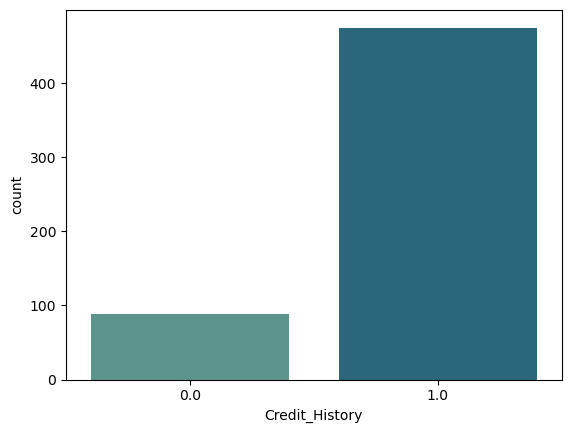

In [26]:
sns.countplot(x = "Credit_History", data = train, palette = "crest")
plt.show()

In [27]:
count_1 = len(train[train.Credit_History == 1])
count_0 = len(train[train.Credit_History == 0])
count_null = len(train[train.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f} %".format((count_1 / (len(train.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f} %".format((count_0 / (len(train.Credit_History))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Credit_History))*100)))

Percentage of Good credit history: 77.36 %
Percentage of Bad credit history: 14.50 %
Missing values percentage: 8.14 %


👉 The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

### Property Area

In [28]:
train.Area.value_counts(dropna=False)

Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

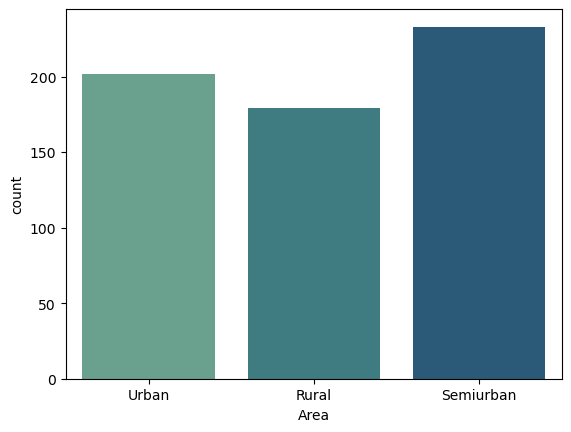

In [29]:
sns.countplot(x = "Area", data = train, palette="crest")
plt.show()

In [30]:
count_urban = len(train[train.Area == 'Urban'])
count_rural = len(train[train.Area == 'Rural'])
count_semi_urban = len(train[train.Area == 'Semiurban'])
count_null = len(train[train.Area.isnull()])

print("Percentage of Urban: {:.2f} %".format((count_urban / (len(train.Area))*100)))
print("Percentage of Rural: {:.2f} %".format((count_rural / (len(train.Area))*100)))
print("Percentage of Semiurban: {:.2f} %".format((count_semi_urban / (len(train.Area))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Area))*100)))

Percentage of Urban: 32.90 %
Percentage of Rural: 29.15 %
Percentage of Semiurban: 37.95 %
Missing values percentage: 0.00 %


This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

### Loan Status

In [31]:
train.Status.value_counts(dropna=False)

Status
Y    422
N    192
Name: count, dtype: int64

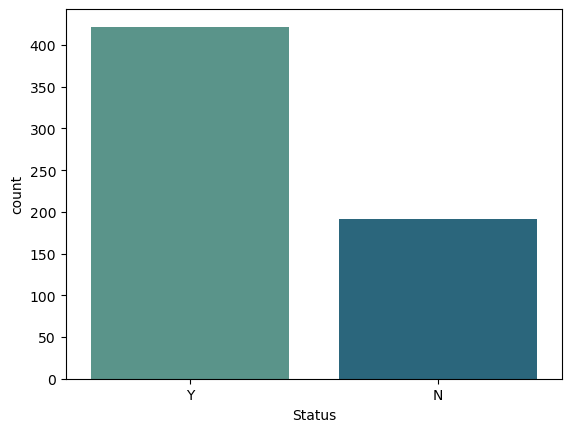

In [32]:
sns.countplot(x = "Status", data = train, palette = "crest")
plt.show()

In [33]:
count_Y = len(train[train.Status == 'Y'])
count_N = len(train[train.Status == 'N'])
count_null = len(train[train.Status.isnull()])

print("Percentage of Approved: {:.2f} %".format((count_Y / (len(train.Status))*100)))
print("Percentage of Rejected: {:.2f} %".format((count_N / (len(train.Status))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Status))*100)))

Percentage of Approved: 68.73 %
Percentage of Rejected: 31.27 %
Missing values percentage: 0.00 %


The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

### Loan Amount Term

In [34]:
train.Term.value_counts(dropna=False)

Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

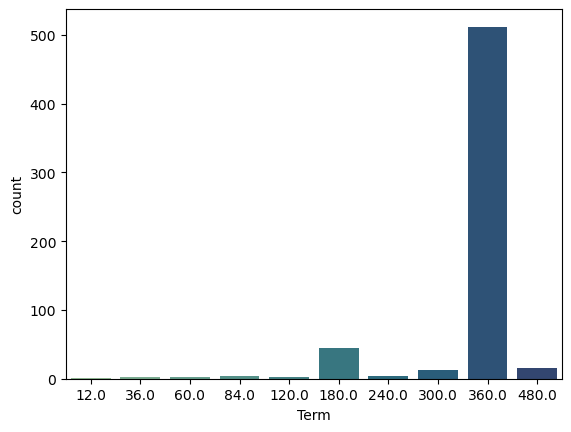

In [35]:
sns.countplot(x = "Term", data = train, palette = "crest")
plt.show()

In [36]:
train.Term.value_counts()/len(train) * 100

Term
360.0    83.387622
180.0     7.166124
480.0     2.442997
300.0     2.117264
240.0     0.651466
84.0      0.651466
120.0     0.488599
60.0      0.325733
36.0      0.325733
12.0      0.162866
Name: count, dtype: float64

As can be seen from the results, the 360 days loan duration is the most popular compared to others.

## Numerical Variable

### Describing Numerical Variable


In [37]:
train[['Applicant_Income','Coapplicant_Income','Loan_Amount']].describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount
count,6.140000e+02,6.140000e+02,6.140000e+02
mean,5.403459e+05,1.621246e+05,1.414104e+07
std,6.109042e+05,2.926248e+05,8.815682e+06
min,1.500000e+04,0.000000e+00,0.000000e+00
25%,2.877500e+05,0.000000e+00,9.800000e+06
50%,3.812500e+05,1.188500e+05,1.250000e+07
75%,5.795000e+05,2.297250e+05,1.647500e+07
max,8.100000e+06,4.166700e+06,7.000000e+07


### Distribution of Numerical Variables

#### Histogram Distribution

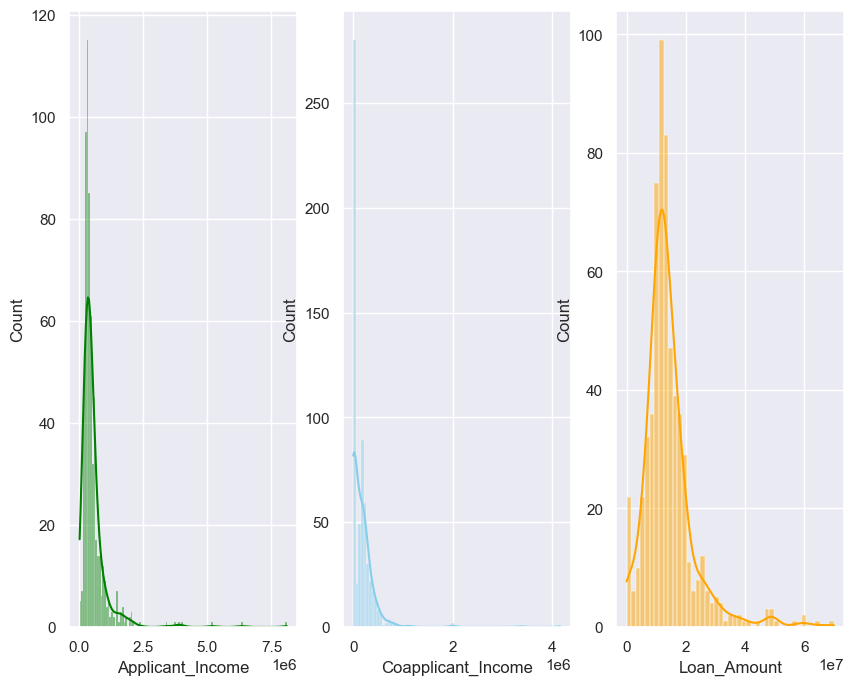

In [38]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
plt.subplot(1,3,1)
sns.histplot(data = train, x = "Applicant_Income", kde = True, color = 'green')
plt.subplot(1,3,2)
sns.histplot(data = train, x = "Coapplicant_Income", kde = True, color = 'skyblue')
plt.subplot(1,3,3)
sns.histplot(data = train, x = "Loan_Amount", kde = True, color = 'orange');

#### Violin Plot

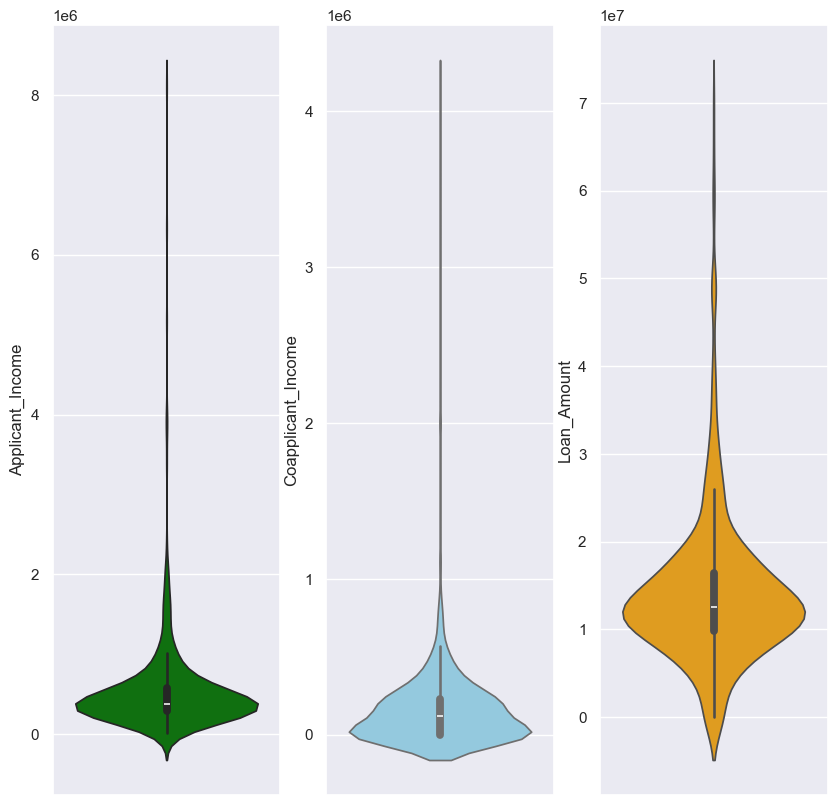

In [39]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(1, 3, figsize=(10, 10))
plt.subplot(1,3,1)
sns.violinplot(data = train, y = "Applicant_Income", color = 'green')
plt.subplot(1,3,2)
sns.violinplot(data = train, y = "Coapplicant_Income", color='skyblue')
plt.subplot(1,3,3)
sns.violinplot(data = train, y = "Loan_Amount", color='orange');

The distribution of Applicant_income, Co_Applicant Income, and Loan_Amount are positively skewed and contains outliers.

The distribution of Loan_Amount Term is negativly skewed and contain outliers as well.



## Other Viz.


### Heatmap

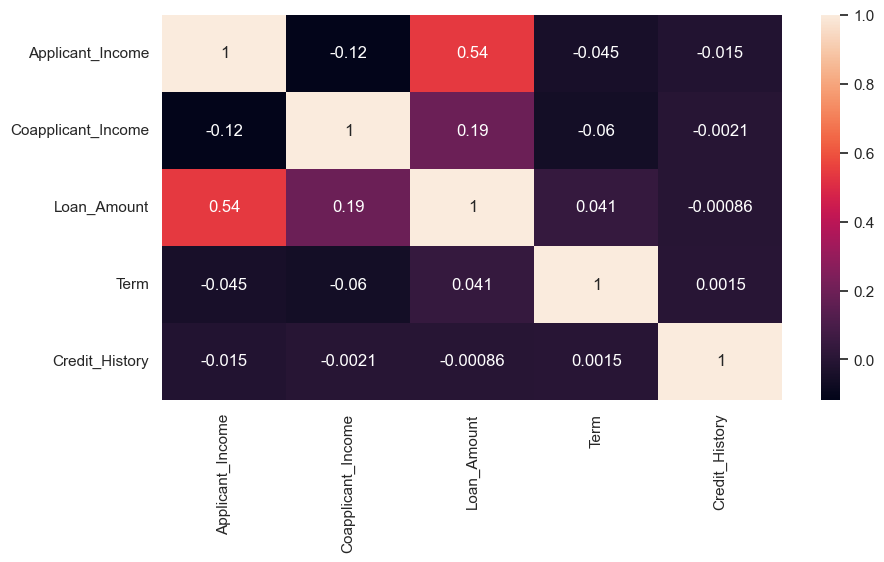

In [40]:
# Select only numeric columns
numeric_data = train.select_dtypes(include=['number'])

plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

We observe positive correlation between Loan Amount and Applicant Income.

### Categorical v/s Categorical

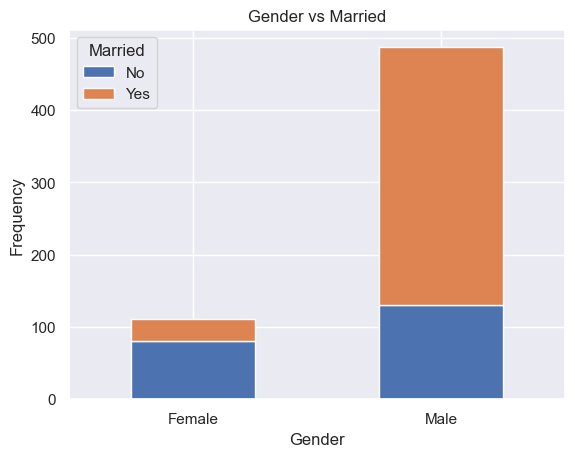

In [41]:
pd.crosstab(train.Gender, train.Married).plot(kind = "bar", stacked = True)
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

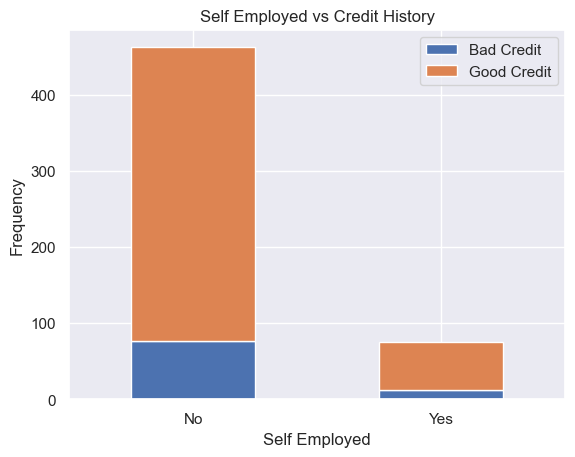

In [42]:
pd.crosstab(train.Self_Employed, train.Credit_History).plot(kind = "bar", stacked = True)
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation = 0)
plt.show()

Most not self employed applicants have good credit compared to self employed applicants.

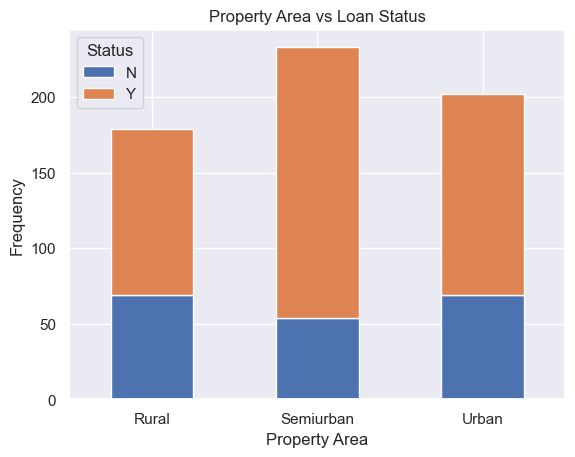

In [43]:
pd.crosstab(train.Area, train.Status).plot(kind = "bar", stacked = True)
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

Most of loans that got accepted has property in Semiurban compared to Urban and Rural.

### Categorical v/s Numerical

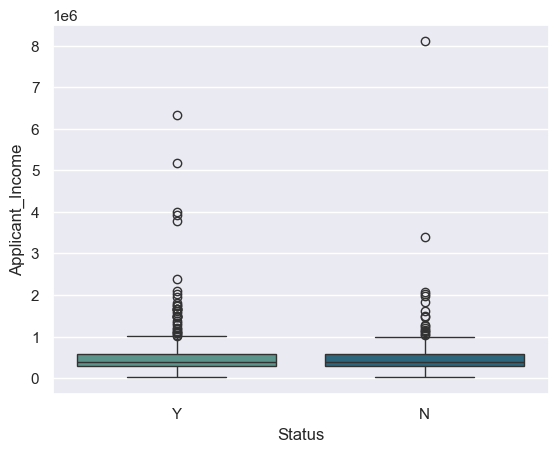

In [44]:
sns.boxplot(x = "Status", y = "Applicant_Income", data = train, palette = 'crest');

We can observe that there are lots of outliers in Applicant Income, and the distribution also positively skewed.

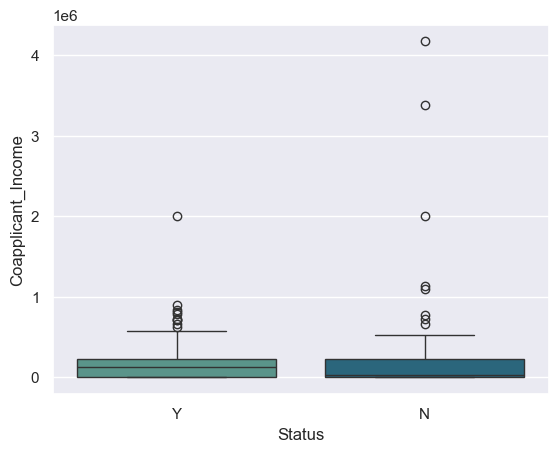

In [45]:
sns.boxplot(x = "Status", y = "Coapplicant_Income", data = train, palette="crest");

It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

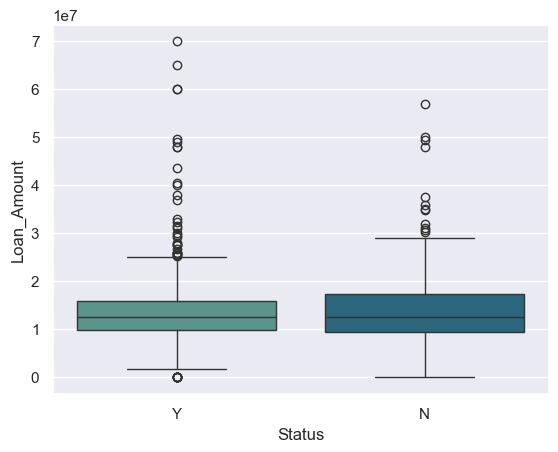

In [46]:
sns.boxplot(x = "Status", y = "Loan_Amount", data = train, palette = "crest");

We observe that Loan Amount has a high number of outliers, and the distribution is also positively skewed.

### Numerical v/s Numerical

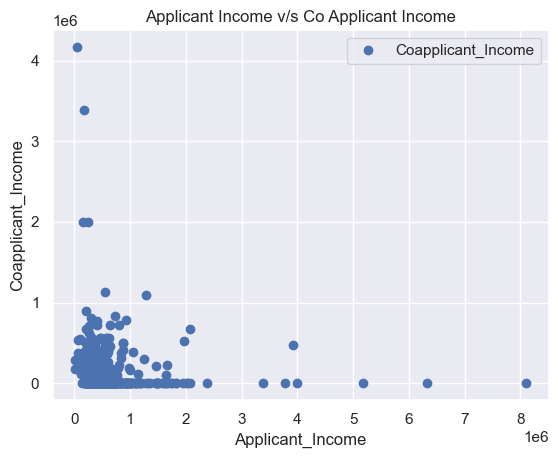

Pearson correlation: -0.11660458122889975
T Test and P value: 
 TtestResult(statistic=13.835753259915663, pvalue=1.4609839484240346e-40, df=1226.0)


In [47]:
train.plot(x = 'Applicant_Income', y = 'Coapplicant_Income', style = 'o')  
plt.title('Applicant Income v/s Co Applicant Income')  
plt.xlabel('Applicant_Income')
plt.ylabel('Coapplicant_Income')  
plt.show()
print('Pearson correlation:', train['Applicant_Income'].corr(train['Coapplicant_Income']))
print('T Test and P value: \n', stats.ttest_ind(train['Applicant_Income'], train['Coapplicant_Income']))

There exists negative correlation between Applicant income and Co Applicant Income.

The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46.


# Data Preprocessing

## Dealing with null values

In [48]:
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

### Data Imputation for categorical variables


In [49]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)
train['Term'].fillna(train['Term'].mode()[0],inplace = True)

Similarly we impute for the test set as well.

In [50]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Married'].fillna(test['Married'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)
test['Term'].fillna(test['Term'].mode()[0],inplace = True)

### Data Imputation for numerical variables

In [51]:
train['Loan_Amount'].fillna(train['Loan_Amount'].mean(),inplace = True)

In [52]:
test['Loan_Amount'].fillna(test['Loan_Amount'].mean(),inplace = True)

## One-hot Encoding

In [53]:
train = pd.get_dummies(train)

# Drop columns
train = train.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
train.rename(columns = new, inplace = True)

In [54]:
test = pd.get_dummies(test)

# Drop columns
test = test.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
test.rename(columns = new, inplace = True)

## Treating Skewness

In [55]:
# Square Root Transformation

train.Applicant_Income = np.sqrt(train.Applicant_Income)
train.Coapplicant_Income = np.sqrt(train.Coapplicant_Income)
train.Loan_Amount = np.sqrt(train.Loan_Amount)

In [56]:
# Square Root Transformation

test.Applicant_Income = np.sqrt(test.Applicant_Income)
test.Coapplicant_Income = np.sqrt(test.Coapplicant_Income)
test.Loan_Amount = np.sqrt(test.Loan_Amount)

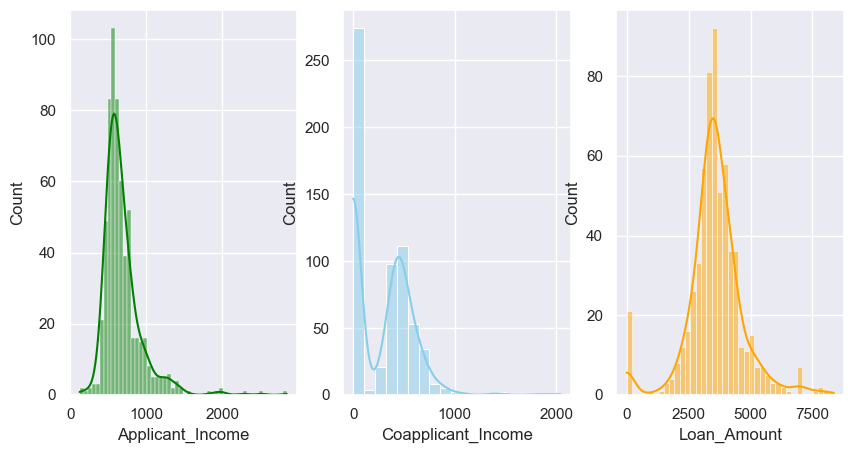

In [57]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize = (10, 5))
plt.subplot(1,3,1)
sns.histplot(data = train, x = "Applicant_Income", kde = True, color='green')
plt.subplot(1,3,2)
sns.histplot(data = train, x = "Coapplicant_Income", kde = True, color='skyblue')
plt.subplot(1,3,3)
sns.histplot(data = train, x = "Loan_Amount", kde = True, color='orange');

We observe that the distributions after using log transformation are much better when compared to the original distribution.

## Separating target variable from the train dataset

In [58]:
train.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender', 'Married', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education', 'Self_Employed',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban', 'Status_Y'],
      dtype='object')

In [59]:
test.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender', 'Married', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education', 'Self_Employed',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban'],
      dtype='object')

In [60]:
x = train.drop(["Status_Y"], axis = 1)
y = train["Status_Y"]

## Dealing with Data Imbalance : SMOTE 

In [61]:
x, y = SMOTE().fit_resample(x, y)

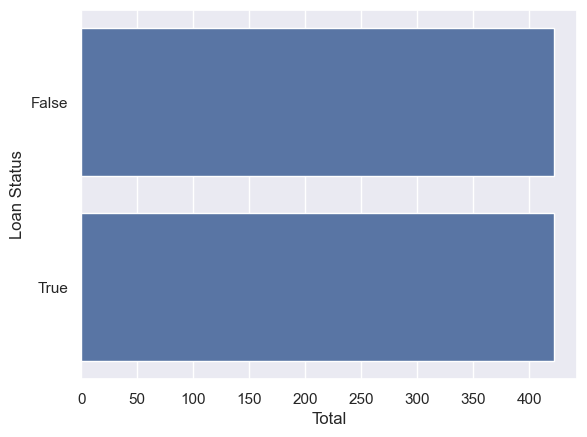

In [62]:
sns.set_theme(style = "darkgrid")
sns.countplot(y = y, data = train)
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

## Data Normalization

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [64]:
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)
test = minmax.transform(test)

# Models

## Logistic Regression

In [65]:
lr = LogisticRegression(solver = 'saga', max_iter = 500, random_state = 1)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       False       0.97      0.70      0.81        94
        True       0.72      0.97      0.83        75

    accuracy                           0.82       169
   macro avg       0.85      0.84      0.82       169
weighted avg       0.86      0.82      0.82       169

[[66 28]
 [ 2 73]]
LR accuracy: 82.25%


## K-Nearest Neighbour (KNN)

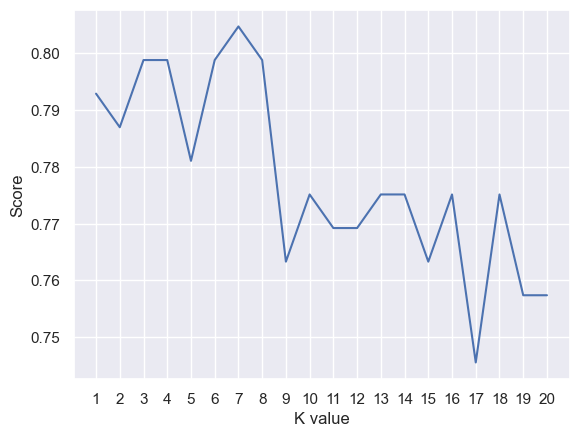

KNN best accuracy: 80.47%


In [66]:
score_knn = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    score_knn.append(knn.score(x_test, y_test))
    
plt.plot(range(1,21), score_knn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(score_knn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## Support Vector Machine (SVM)

In [67]:
svc = SVC(kernel='rbf', max_iter=500)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       False       0.97      0.66      0.78        94
        True       0.70      0.97      0.81        75

    accuracy                           0.80       169
   macro avg       0.83      0.82      0.80       169
weighted avg       0.85      0.80      0.80       169

[[62 32]
 [ 2 73]]
SVC accuracy: 79.88%


## Naive Bayes

### Categorical NB

In [68]:
nbc1 = CategoricalNB()
nbc1.fit(x_train, y_train)

y_pred = nbc1.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       False       0.95      0.66      0.78        94
        True       0.69      0.96      0.80        75

    accuracy                           0.79       169
   macro avg       0.82      0.81      0.79       169
weighted avg       0.84      0.79      0.79       169

[[62 32]
 [ 3 72]]
Categorical Naive Bayes accuracy: 79.29%


### Gaussian NB

In [69]:
nbc2 = GaussianNB()
nbc2.fit(x_train, y_train)

y_pred = nbc2.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       False       0.92      0.62      0.74        94
        True       0.66      0.93      0.77        75

    accuracy                           0.76       169
   macro avg       0.79      0.78      0.76       169
weighted avg       0.81      0.76      0.75       169

[[58 36]
 [ 5 70]]
Gaussian Naive Bayes accuracy: 75.74%


## Decision Tree

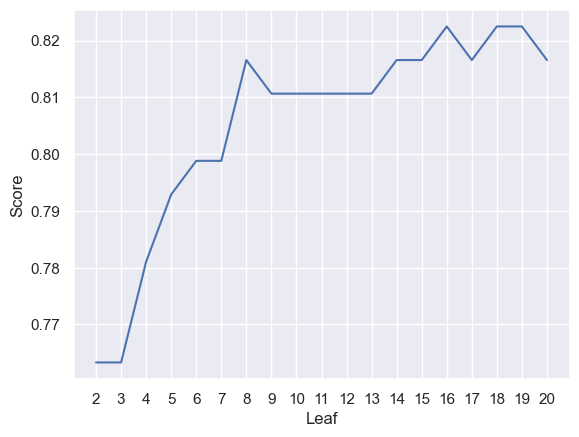

Decision Tree Accuracy: 82.25%


In [70]:
score_dt = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(max_leaf_nodes=i)
    dtc.fit(x_train, y_train)
    score_dt.append(dtc.score(x_test, y_test))
    
plt.plot(range(2,21), score_dt)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(score_dt)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## Random Forest

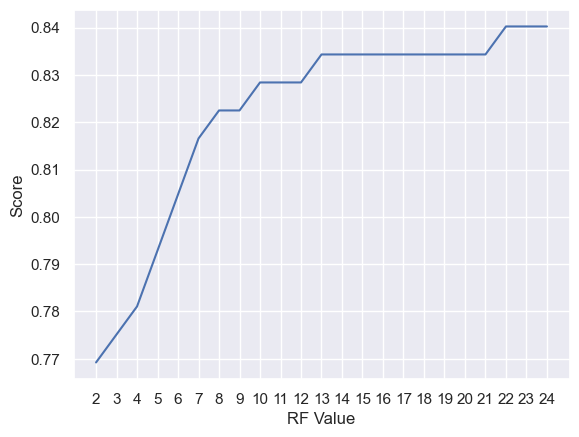

Random Forest Accuracy:  84.02%


In [71]:
score_rf = []
best_score = 0
best_rfc = None

for i in range(2, 25):
    rfc = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    rfc.fit(x_train, y_train)
    score = rfc.score(x_test, y_test)
    score_rf.append(score)
    
    if score > best_score:
        best_score = score
        best_rfc = rfc
    
plt.plot(range(2,25), score_rf)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(score_rf)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## Gradient Boosting

In [72]:
paramsGB={'n_estimators' : [100,300,500],
      'max_depth' : [1,3,5],
      'subsample' : [1],
      'max_leaf_nodes' : [2,5,10]}

In [73]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(x_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 3, 5],
                                        'max_leaf_nodes': [2, 5, 10],
                                        'n_estimators': [100, 300, 500],
                                        'subsample': [1]})

In [74]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_leaf_nodes=5, subsample=1)
0.8323529411764706
{'subsample': 1, 'n_estimators': 100, 'max_leaf_nodes': 5, 'max_depth': 3}
4


In [75]:
gbc = GradientBoostingClassifier(subsample = 0.5, n_estimators = 400, max_depth = 4, max_leaf_nodes = 10)
gbc.fit(x_train, y_train)

y_pred = gbc.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

       False       0.90      0.79      0.84        94
        True       0.77      0.89      0.83        75

    accuracy                           0.83       169
   macro avg       0.84      0.84      0.83       169
weighted avg       0.84      0.83      0.83       169

[[74 20]
 [ 8 67]]
Gradient Boosting accuracy: 83.43%


# Model Comparison 

In [76]:
comparison = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
6,Random Forest,84.023669
7,Gradient Boost,83.431953
0,Logistic Regression,82.248521
5,Decision Tree,82.248521
1,K Neighbors,80.473373
2,SVM,79.881657
3,Categorical NB,79.289941
4,Gaussian NB,75.739645


Going forward with random forest.

In [77]:
import pickle


with open('loan_approval_model.pkl', 'wb') as f:
    pickle.dump(best_rfc, f)